<a href="https://colab.research.google.com/github/Samuel-Wamwitha/Core-IP-Week-1/blob/master/Samuel_Wamwitha_Core_IP_WK_2_10_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis

##1. Defining the Question

###a) Specifying the data analytic question

> The research problem is to predict which individuals are most likely to have or use a bank account.

###b) Defining the metric for success

> The metric for success is to find which demographic characteristics influence a person to have or use a bank account.

###c) Understanding the context

> There are various factors that influence a person to own a bank account or use a bank account. To solve our research problem we will use dataset that has demographic records from various respondents who participated in the survey.

###d) Recording the experimental design

> To implement the solution we will first perform data reduction to reduce our many features then do Linear discriminant analysis and Factor analysis to predict which individuals are likely to have a bank account.

###e) Data Relevance

> The data is relevant since it is data from various respondents who have a bank account and those who do not have a bank account. 

##2. Reading the Data

In [105]:
#Import libraries to be used.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load in the Data
url = "http://bit.ly/FinancialDataset"
fin_df = pd.read_csv(url)

##3. Checking the Data

In [106]:
# Determining number of records in the dataset
fin_df.shape

(23524, 13)

In [107]:
# Previewing the top of our dataset
fin_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [108]:
# Previewing the bottom of our dataset
fin_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [109]:
# Checking whether each column has an appropriate datatype
fin_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

##4. External Data Source validation

##5. Tidying the Dataset

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


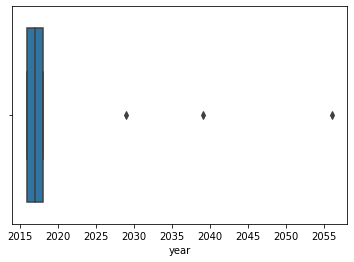

In [110]:
#Checking for outliers
sns.boxplot(fin_df['year'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


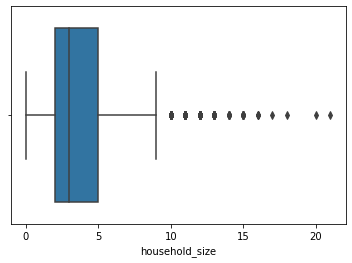

In [111]:
sns.boxplot(fin_df['household_size'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


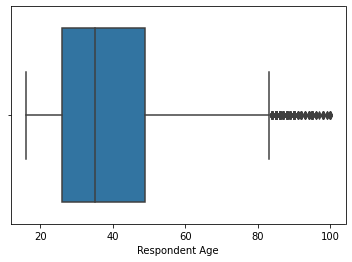

In [112]:
sns.boxplot(fin_df['Respondent Age'])

In [113]:
#Checking for duplicates
fin_df.duplicated().sum()

0

In [114]:
#Identifying missing data
fin_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [115]:
#Dealing with missing data
fin_df = fin_df.dropna()

In [116]:
#More Data cleaning procedures
fin_df = fin_df.rename({"The relathip with head":"The relationship with head","Level of Educuation":"Level of Education"}, axis='columns') 
fin_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relationship with head,marital_status,Level of Education,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [117]:
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     23343 non-null  object 
 1   year                        23343 non-null  int64  
 2   uniqueid                    23343 non-null  object 
 3   Has a Bank account          23343 non-null  object 
 4   Type of Location            23343 non-null  object 
 5   Cell Phone Access           23343 non-null  object 
 6   household_size              23343 non-null  float64
 7   Respondent Age              23343 non-null  float64
 8   gender_of_respondent        23343 non-null  object 
 9   The relationship with head  23343 non-null  object 
 10  marital_status              23343 non-null  object 
 11  Level of Education          23343 non-null  object 
 12  Type of Job                 23343 non-null  object 
dtypes: float64(2), int64(1), object

In [118]:
#Dealing with outliers
year1, year3 = np.percentile(fin_df.year, [25, 75]) 
iqr = year3 - year1
upper_bound = year3 + (1.5 * iqr)
fin_df = fin_df[~(fin_df.year>upper_bound)]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


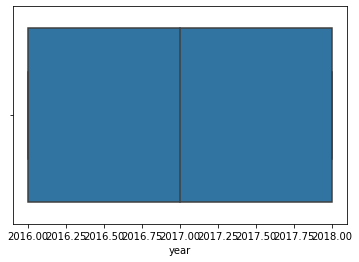

In [119]:
sns.boxplot(fin_df['year'])

In [120]:
size1, size3 = np.percentile(fin_df.household_size, [25, 75]) 
iqr = size3 - size1
upper_bound = size3 + (1.5 * iqr)
fin_df = fin_df[~(fin_df.household_size>upper_bound)]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


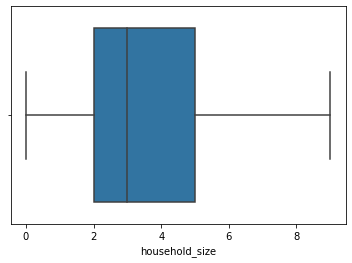

In [33]:
sns.boxplot(fin_df['household_size'])

In [121]:
age1, age3 = np.percentile(fin_df['Respondent Age'], [25, 75]) 
iqr = age3 - age1
upper_bound = age3 + (1.5 * iqr)
fin_df = fin_df[~(fin_df['Respondent Age']>upper_bound)]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


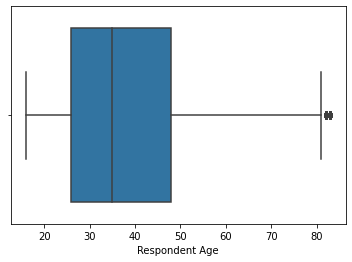

In [122]:
sns.boxplot(fin_df['Respondent Age'])

In [123]:
age1, age3 = np.percentile(fin_df['Respondent Age'], [25, 75]) 
iqr = age3 - age1
upper_bound = age3 + (1.5 * iqr)
fin_df = fin_df[~(fin_df['Respondent Age']>upper_bound)]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


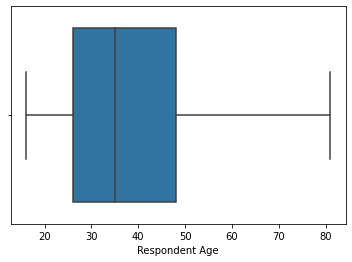

In [124]:
sns.boxplot(fin_df['Respondent Age'])

In [125]:
#Checking unique values in relationship with head column.
fin_df["The relationship with head"].unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives'], dtype=object)

In [126]:
#Checking unique values in type of job column.
fin_df["Type of Job"].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [127]:
#Checking unique values in marital_status column.
fin_df["marital_status"].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

In [128]:
#Checking unique values in Level of Education column.
fin_df["Level of Education"].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6'], dtype=object)

##6. Exploratory Analysis

###Univariate Analysis

In [129]:
#Analysis of Respondent's Age.
#The following code finds the mean of ages.
fin_df['Respondent Age'].mean()

38.20585378774501

In [130]:
#The following code finds the median of ages.
fin_df['Respondent Age'].median()

35.0

In [131]:
#The following code finds the mode of ages.
fin_df['Respondent Age'].mode()

0    30.0
dtype: float64

In [132]:
#The following codes measure dispersion in the Respondent Age column
#The code below find the range in the ages of the respondents
age_max = fin_df['Respondent Age'].max()
age_min = fin_df['Respondent Age'].min()

age_max - age_min

65.0

In [133]:
#The code below calculates the skewness of the respondent's age
fin_df['Respondent Age'].skew()
#The output shows a positive value hence the age column is positively skewed

0.7226033418619637

In [134]:
#The code below calculates the kurtosis of respondent's age
fin_df['Respondent Age'].kurt()
#The output shows a value of -0.2814 which indicates there is almost no outliers

-0.28141227316223816

In [135]:
#Analysis of Household size.
#The following code finds the mean of household sizes
fin_df['household_size'].mean()

3.584142680558008

In [136]:
#The following code finds the median of household sizes
fin_df['household_size'].median()

3.0

In [137]:
#The following code finds the mode of household sizes
fin_df['household_size'].mode()

0    2.0
dtype: float64

In [138]:
#The following codes perform measures of dispersion of household size column
#The code below finds the range of the household sizes
hh_max = fin_df['household_size'].max()
hh_min = fin_df['household_size'].min()
hh_max - hh_min

9.0

In [140]:
#The code below calculates the skewness of the household size
fin_df['household_size'].skew()
#The output shows a positive value of 0.6029 hence the age column is positively skewed

0.6029374931143053

In [141]:
#The code below calculates the kurtosis of household size
fin_df['household_size'].kurt()
#The output shows a value of -0.5091 which indicates there is almost no outliers.

-0.5091220049695515

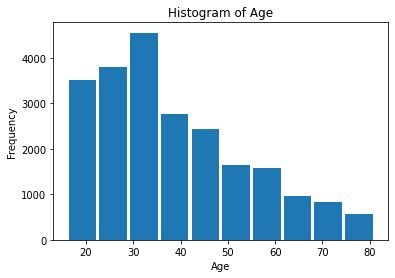

In [143]:
#The following code plots a histogram of Respondent's age.
age = fin_df['Respondent Age']
plt.hist(age, bins=10, histtype='bar', rwidth=0.9)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

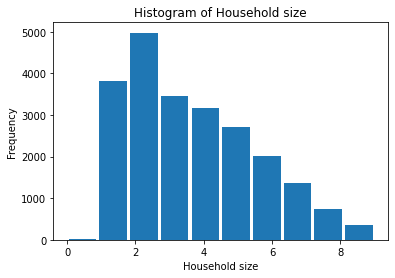

In [144]:
#The following code plots a histogram of Respondent's age.
hh = fin_df['household_size']
plt.hist(hh, bins=10, histtype='bar', rwidth=0.9)
plt.title('Histogram of Household size')
plt.xlabel('Household size')
plt.ylabel('Frequency')
plt.show()

In [145]:
#The following code shows the frequency table of respondents who own a bank account and those who don't.
#The output shows 3228 respondents have a bank account and 19424 respondents do not have a bank account.
frequency_df = fin_df['Has a Bank account']
frequency_df.value_counts()

No     19424
Yes     3228
Name: Has a Bank account, dtype: int64

In [146]:
#The following code shows the frequency table of the gender of respondents.
#The output shows 13362 respondents are female and 9290 respondents are male.
frequency_df = fin_df['gender_of_respondent']
frequency_df.value_counts()

Female    13362
Male       9290
Name: gender_of_respondent, dtype: int64

In [147]:
#The following code shows the frequency table of respondents who have cell phone access and those who don't.
#The output shows 16951 respondents have cell phone access and 5701 respondents do not have cell phone access.
frequency_df = fin_df['Cell Phone Access']
frequency_df.value_counts()

Yes    16951
No      5701
Name: Cell Phone Access, dtype: int64

In [148]:
#The following code shows the frequency table of the location of respondents.
#The output shows 13758 respondents live in rural areas and 8894 respondents live in urban areas.
frequency_df = fin_df['Type of Location']
frequency_df.value_counts()

Rural    13758
Urban     8894
Name: Type of Location, dtype: int64

###Bivariate Analysis

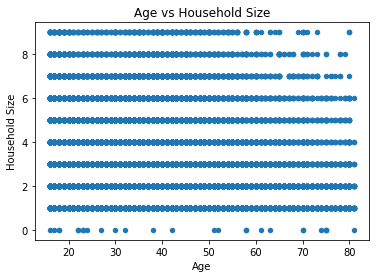

In [149]:
#Using Pandas to plot a scatter plot between Respondent's age and their household size.
fin_df.plot(x = 'Respondent Age', y = 'household_size', kind = 'scatter')
plt.title('Age vs Household Size')
plt.xlabel('Age')
plt.ylabel('Household Size')
plt.show()

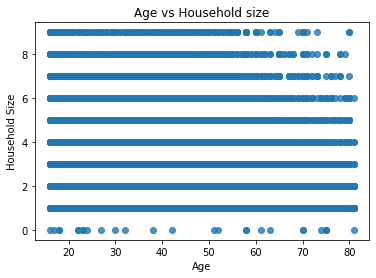

In [150]:
#Using seaborn to plot scatter plot between Respondent's age and their household size.
sns.regplot(x = fin_df['Respondent Age'], y = fin_df['household_size'],fit_reg=False)
plt.title('Age vs Household size')
plt.xlabel('Age')
plt.ylabel('Household Size')
plt.show()
#The resulting scatterplot show no relationship between Respondent's age and household size.

In [151]:
#Finding linear correlation between household size and respondent's age
#The following code find s linear correlation between household size and respondent's age
cf = fin_df["Respondent Age"].corr(fin_df["household_size"]) 
print(cf)
#The output shows a correlation value of -0.1019 which is close to zero hence it shows there is no correlation between Respondent's age and household size.

-0.10188783621941146


###Multivariate Analysis

####Data reduction using PCA

In [152]:
fin_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relationship with head,marital_status,Level of Education,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [153]:
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22652 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     22652 non-null  object 
 1   year                        22652 non-null  int64  
 2   uniqueid                    22652 non-null  object 
 3   Has a Bank account          22652 non-null  object 
 4   Type of Location            22652 non-null  object 
 5   Cell Phone Access           22652 non-null  object 
 6   household_size              22652 non-null  float64
 7   Respondent Age              22652 non-null  float64
 8   gender_of_respondent        22652 non-null  object 
 9   The relationship with head  22652 non-null  object 
 10  marital_status              22652 non-null  object 
 11  Level of Education          22652 non-null  object 
 12  Type of Job                 22652 non-null  object 
dtypes: float64(2), int64(1), object

The following codes label encodes the various columns to convert them from objects to integers.

In [154]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
fin_df['Type of Location']=lb.fit_transform(fin_df['Type of Location'])

In [155]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
fin_df['Cell Phone Access']=lb.fit_transform(fin_df['Cell Phone Access'])

In [156]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
fin_df['gender_of_respondent']=lb.fit_transform(fin_df['gender_of_respondent'])

In [157]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
fin_df['The relationship with head']=lb.fit_transform(fin_df['The relationship with head'])

In [158]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
fin_df['marital_status']=lb.fit_transform(fin_df['marital_status'])

In [159]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
fin_df['Level of Education']=lb.fit_transform(fin_df['Level of Education'])

In [160]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
fin_df['Type of Job']=lb.fit_transform(fin_df['Type of Job'])

In [161]:
#The following code checks fo information about the dataset to confirm our columns have been encoded.
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22652 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     22652 non-null  object 
 1   year                        22652 non-null  int64  
 2   uniqueid                    22652 non-null  object 
 3   Has a Bank account          22652 non-null  object 
 4   Type of Location            22652 non-null  int64  
 5   Cell Phone Access           22652 non-null  int64  
 6   household_size              22652 non-null  float64
 7   Respondent Age              22652 non-null  float64
 8   gender_of_respondent        22652 non-null  int64  
 9   The relationship with head  22652 non-null  int64  
 10  marital_status              22652 non-null  int64  
 11  Level of Education          22652 non-null  int64  
 12  Type of Job                 22652 non-null  int64  
dtypes: float64(2), int64(8), object

In [162]:
#The first step in PCA is to divide the dataset into features and labels. In the following code our features are stored in X variable and our labels are stored in the y variable.
X = fin_df.iloc[:, 4:13].values
y = fin_df.iloc[:, 3].values

In [163]:
#The following code splits the dataset into Training sets and Test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [164]:
#The following codes normalize our feature set by performining standard scalar normalization.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [165]:
#The following codes fit the feature set and then transform them to get a specific number of principle components.
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [166]:
#The following code finds the variance each principal component causes.
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.1885386 , 0.17638912, 0.17170526, 0.10766788, 0.09179961,
       0.08102655, 0.07118375, 0.06091593, 0.05077329])

In [167]:
#The following codes perform PCA using only 1 principal component
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#The code below makes predictions using Random Forest Classifier.
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# The code below predicts the Test set results
y_pred = classifier.predict(X_test)

In [168]:
#The following codes perform evaluation.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))
#The output shows that with only one features, the random forest algorithm is able to correctly predict 3854 out of 4531 instances resulting in 85.06% accuracy.

[[3854    0]
 [ 677    0]]
Accuracy 0.8505848598543367


In [169]:
#The following codes perform PCA using 2 principal components
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [170]:
#Performance evaluation where 2 principal components were used
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

#The output shows that with only 2 features, the random forest algorithm is able to correctly predict 3854 out of 4531 instances resulting in 85.06% accuracy.

[[3854    0]
 [ 677    0]]
Accuracy 0.8505848598543367


In [171]:
#The following codes perform PCA using full features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [172]:
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))
#The output shows that with all the features, the random forest algorithm is able to correctly predict 3854 out of 4531 instances resulting in 86.46% accuracy.
#From the 3 PCA conducted we can note that the accuracy does not change with addition of more principal components.

[[3854    0]
 [ 677    0]]
Accuracy 0.8505848598543367


##7. Implementing the solution

###Linear Discriminant Analysis

In [173]:
#The first step in PCA is to divide the dataset into features and labels. In the following code our features are stored in X variable and our labels are stored in the y variable.
X = fin_df.iloc[:, 4:13].values
y = fin_df.iloc[:, 3].values

In [174]:
#The following code splits the dataset into Training sets and Test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [175]:
#The following codes normalize our feature set by performining standard scalar normalization.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [176]:
#The following codes perform Linear Discriminant Analysis using Scikit learn.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [177]:
#The code below makes predictions using Random Forest Classifier.
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [178]:
#The following codes do a performance evaluation.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

#With one linear discriminant the predicting model achieves 86.74% accuracy which is greater than the accuracy pf PCA for 1 component.

[[3781   73]
 [ 528  149]]
Accuracy 0.8673581990730523


###Factor Analysis

In [179]:
fin_df = fin_df.iloc[0:,4:13]

In [180]:
#The following code installs the factor anylzer we are going to use for Factor Analysis.
!pip install factor_analyzer==0.2.3

#We need to evaluate our dataset to ensure it has factorability. To do so we will perform two tests Bartlett sphericity and KMO Test.
#The following code performs the Bartlett sphericity test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(fin_df)
chi_square_value, p_value
#The test results to a p-value of 0 hence the test was significant. This shows the dataset has factorability.

(21301.821965729017, 0.0)

In [181]:
#The following code perform the KMO test
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(fin_df)
kmo_all,kmo_model
#The KMO for the data was 0.54995 which is relatively good hence thereis factorability.

(                                 KMO
 Type of Location            0.593588
 Cell Phone Access           0.615705
 household_size              0.638398
 Respondent Age              0.558493
 gender_of_respondent        0.479976
 The relationship with head  0.482527
 marital_status              0.534450
 Level of Education          0.546617
 Type of Job                 0.610603, 0.5499507812590969)

In [182]:
#To perform Factor analysis we will import factor_analyzer as FactorAnalyzer
from factor_analyzer import FactorAnalyzer

# We will then create a factor analysis object fa and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(fin_df, 9, rotation=None)

# The following code checks for the Eigenvalues
ev, v = fa.get_eigenvalues()
ev
#Numbers with eigen values greater than one are considered as the number of factors

,Original_Eigenvalues
0,1.698133
1,1.590671
2,1.542470
3,0.965943
4,0.826038
5,0.734746
6,0.631840
7,0.551472
8,0.458688


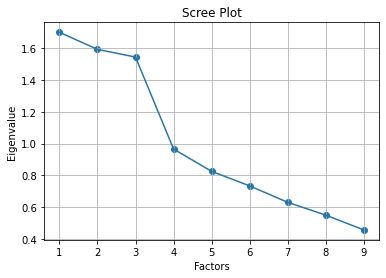

In [183]:
#The following codes plots a scree plot for each factor and its eigen value.
plt.scatter(range(1,fin_df.shape[1]+1),ev)
plt.plot(range(1,fin_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()
 

In [184]:
#Performing factor analysis on 4 factors
fa = FactorAnalyzer()
fa.analyze(fin_df, 4, rotation="varimax")
fa.loadings
#Factor 1 has high factor loadings for Gender of respondent
#Factor 2 has high factor loadings in Level of education
#Factor 3 has high Factor loadings in Type of location
#Factor 3 has high factor loadings in the relationship with head

,Factor1,Factor2,Factor3,Factor4
Type of Location,0.005256,0.048613,0.634012,-0.029681
Cell Phone Access,0.084846,0.294208,-0.196053,0.069628
household_size,-0.036497,0.004667,-0.416785,0.240579
Respondent Age,0.095792,-0.263708,-0.095441,-0.468059
gender_of_respondent,0.983240,0.050626,0.003534,0.167290
The relationship with head,-0.526462,-0.072046,0.012065,0.280672
marital_status,-0.012319,-0.059966,0.112958,-0.428133
Level of Education,0.039223,0.883254,0.148837,0.189490
Type of Job,-0.038086,-0.059891,0.599709,0.086537


In [185]:
#Performing factor analysis on 3 factors
fa = FactorAnalyzer()
fa.analyze(fin_df, 3, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3
Type of Location,0.004832,0.666985,0.055511
Cell Phone Access,-0.138089,-0.184898,0.301892
household_size,0.061567,-0.431542,0.142887
Respondent Age,-0.091572,-0.064327,-0.533807
gender_of_respondent,-0.527008,-0.019251,0.116210
The relationship with head,0.925120,-0.025009,0.164342
marital_status,-0.053196,0.142271,-0.308538
Level of Education,-0.136092,0.132550,0.618313
Type of Job,0.064472,0.552887,0.029917


In [186]:
#Getting variance of each factors
fa.get_factor_variance()
#The output shows that 34.698% cumulative variance is explained by 3 factors.

,Factor1,Factor2,Factor3
SS Loadings,1.190360,1.013913,0.918503
Proportion Var,0.132262,0.112657,0.102056
Cumulative Var,0.132262,0.244919,0.346975


##8. Challenging the solution

In [ ]:
# Reviewing the Solution
#Data on the income of respondents will be useful to get insights if income of people influences them to have a bank account.

##9. Follow up questions

###a). Did we have the right data?

> Yes we had the right data for analysis.

###b). Do we need other data to answer our question?

> Yes we need additional data to understand all the factors that have influence on whether a person has a bank account or uses a bank account.

###c). Did we have the right question?

> The question was right since it asked about the demographic factors that influence one having a bank account.